# 期末課題
#### 世界各地の幸福度 - 最も幸福な場所はどこか -

1254810299 桑久保陽平

In [12]:
pip install japanize_matplotlib


     ---------------------------------------- 0.0/4.1 MB ? eta -:--:--
     ---------------------------------------- 4.1/4.1 MB 24.2 MB/s  0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120323 sha256=cc80dd0d93694822d6f653fb3539a0c8d1fdb0d45e5164f909e227c187aed4c5
  Stored in directory: c:\users\kuyou\appdata\local\pip\cache\wheels\56\8b\41\7c8a47025c6eef46f0b7488f2510fff13e48f1e7d5bf26e21b
Successfully built japanize_matplotlib
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
# 必要なライブラリをインポート

import pandas as pd
import matplotlib.pyplot as plt

# CSVファイルを読み込む
df = pd.read_csv('world_happiness_report.csv')

# データの最初の5行を表示
df.head()

,Unnamed: 0,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
0,0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


### 1.幸福度ランキングTop5

7年分となるとデータ量がかなり多くなりそうなので2015年に絞ってやります

In [7]:

df_2015 = df[df["year"] == 2015]

top5 = (
    df_2015
    .sort_values("Happiness Rank")
    .head(5)[["Country", "Happiness Rank", "Happiness Score"]]
)

print(top5)



       Country  Happiness Rank  Happiness Score
0  Switzerland             1.0            7.587
1      Iceland             2.0            7.561
2      Denmark             3.0            7.527
3       Norway             4.0            7.522
4       Canada             5.0            7.427


### 2.幸福度下位5か国

こちらも2015年のみピックアップしています

In [8]:
bottom5 = (
    df_2015
    .sort_values("Happiness Rank", ascending=False)
    .head(5)[["Country", "Happiness Rank", "Happiness Score"]]
)

print(bottom5)


     Country  Happiness Rank  Happiness Score
157     Togo           158.0            2.839
156  Burundi           157.0            2.905
155    Syria           156.0            3.006
154    Benin           155.0            3.340
153   Rwanda           154.0            3.465


### 3.日本の幸福度ランキング

2015年における日本の幸福度順位

In [9]:
japan = df_2015[df_2015["Country"] == "Japan"][
    ["Country", "Happiness Rank", "Happiness Score"]
]

print(japan)


   Country  Happiness Rank  Happiness Score
45   Japan            46.0            5.987


## 分析1

幸福度が高い国はスイスやアイスランドなどの平和で争いなどが少ない国が多い。逆に下位はトンゴやブルンジなど紛争が起きているような国が多い。紛争などが多発しているからか、それらの国の多くは外務省の海外安全ホームページにおいても危険視されている。<br>
日本は46位ということで、大体上位3分の1くらいに位置する感じで、良いとも悪いとも言えない順位だなと感じた。

### 4.棒グラフによる幸福度可視化

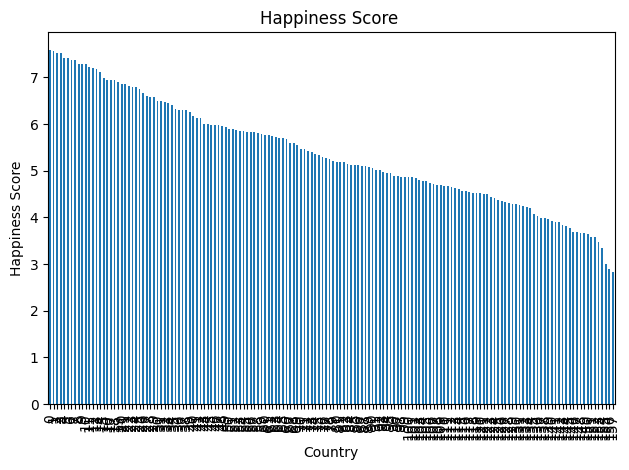

In [15]:
plt.figure()
df_2015["Happiness Score"].plot(kind="bar")
plt.title("Happiness Score ")
plt.xlabel("Country")
plt.ylabel("Happiness Score")
plt.tight_layout()
plt.show()


### 4.1 自由度

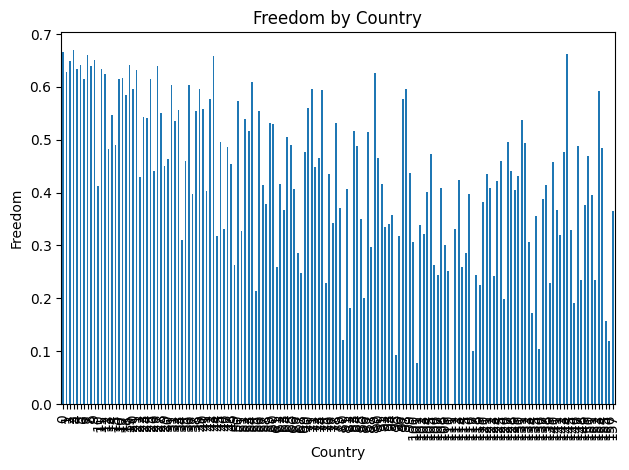

In [17]:
plt.figure()
df_2015["Freedom"].plot(kind="bar")
plt.title("Freedom by Country")
plt.xlabel("Country")
plt.ylabel("Freedom")
plt.tight_layout()
plt.show()

### 4.2 政府への信頼度

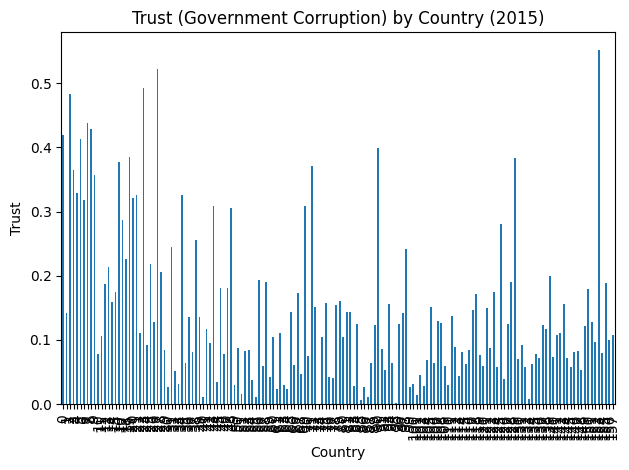

In [18]:
plt.figure()
df_2015["Trust (Government Corruption)"].plot(kind="bar")
plt.title("Trust (Government Corruption) by Country (2015)")
plt.xlabel("Country")
plt.ylabel("Trust")
plt.tight_layout()
plt.show()

## 分析2

国が多すぎて国名の部分が見づらくなってしまったため、すべての国をグラフにリストアップするのは良くないと思った。

## あまりに見づら過ぎたので上位10に絞ってやり直し

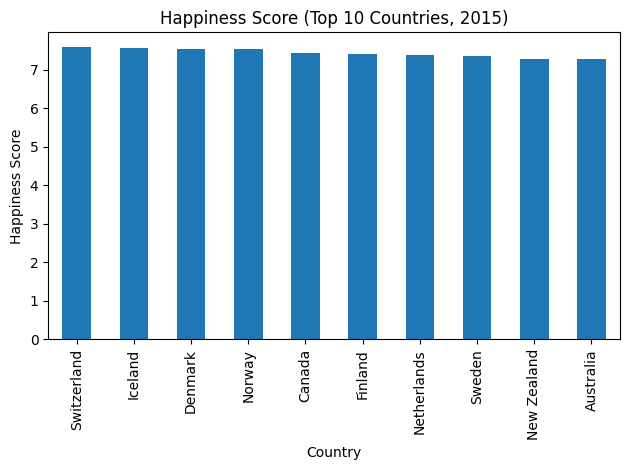

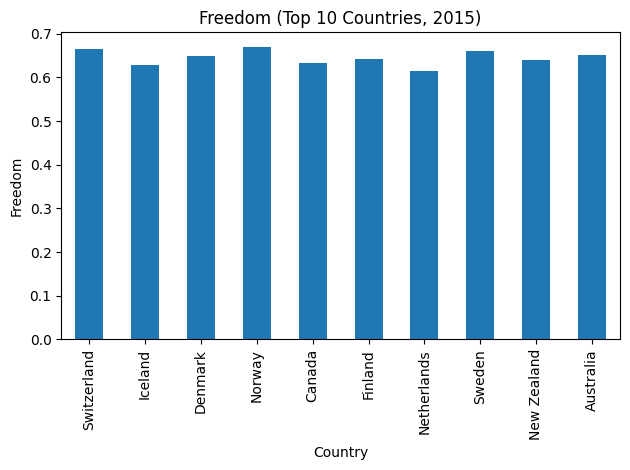

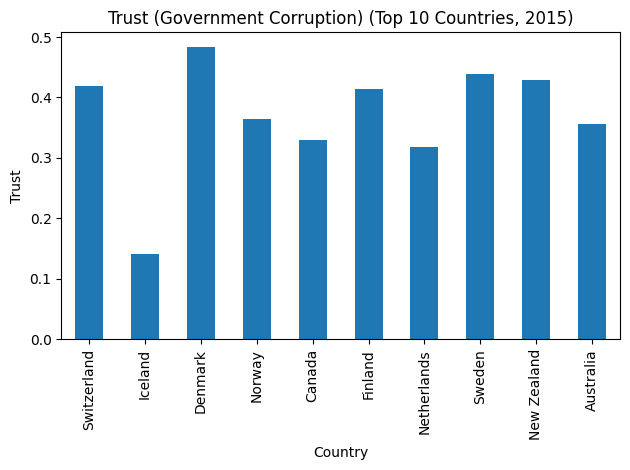

In [25]:



top10 = df_2015.sort_values("Happiness Rank").head(10)
top10 = top10.set_index("Country")


plt.figure()
top10["Happiness Score"].plot(kind="bar")
plt.title("Happiness Score (Top 10 Countries, 2015)")
plt.xlabel("Country")
plt.ylabel("Happiness Score")
plt.tight_layout()
plt.show()


plt.figure()
top10["Freedom"].plot(kind="bar")
plt.title("Freedom (Top 10 Countries, 2015)")
plt.xlabel("Country")
plt.ylabel("Freedom")
plt.tight_layout()
plt.show()


plt.figure()
top10["Trust (Government Corruption)"].plot(kind="bar")
plt.title("Trust (Government Corruption) (Top 10 Countries, 2015)")
plt.xlabel("Country")
plt.ylabel("Trust")
plt.tight_layout()
plt.show()


見やすくなりました

## 分析3
見やすくするためにもデータ量が多い場合は一部に絞り込んだ方がよいと思った。前の3つの項目はどれも同じような国ばかりになっているため、政府への信頼が厚ければ自由につながる = 幸福度が高いといえると考えた。

## 結論

国民の幸福追求には政府への信頼や争いごとの少なさが大事だと考えた。日本は長らく政府への信頼は高いとは言えない状況が続いてきたのでそれを考えると46位という結果にも納得がいく。